# Machine Learning Assignment 2
## Submitted by(id's):
*   207496951
*   322217456

# Preliminary data analysis
*   Loading the data and spliting into train, test, dev
*   Understanding the data and the need for a classification model
*   Finding the target classes
*   Determining the data is imbalanced
*   Existence of outliers
*   Plots of feature values







Train shape: (40533, 43)
Number of train samples: 40533
Dev shape: (13512, 43)
Number of dev samples: 13512
Test shape:  (13512, 43)
Number of test samples: 13512
Number of features: 43
Statistics for each feature:
                  f0            f1            f2            f3            f4  \
count  40533.000000  40533.000000  40533.000000  40533.000000  40533.000000   
mean       0.959539      0.540054      0.270890      0.131745      0.051982   
std        0.834109      0.779471      0.612657      0.448263      0.290031   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        1.000000      0.000000      0.000000      0.000000      0.000000   
75%        2.000000      1.000000      0.000000      0.000000      0.000000   
max        2.000000      2.000000      2.000000      2.000000      2.000000   

                 f5            f6            f7            f8           

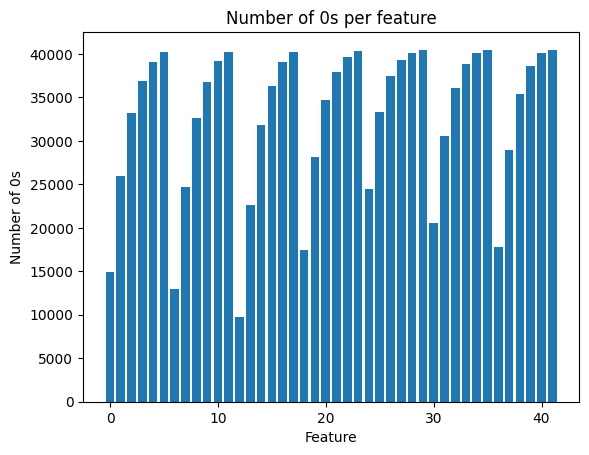

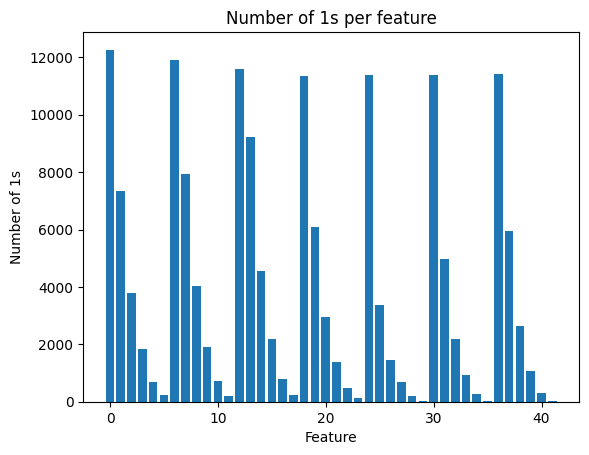

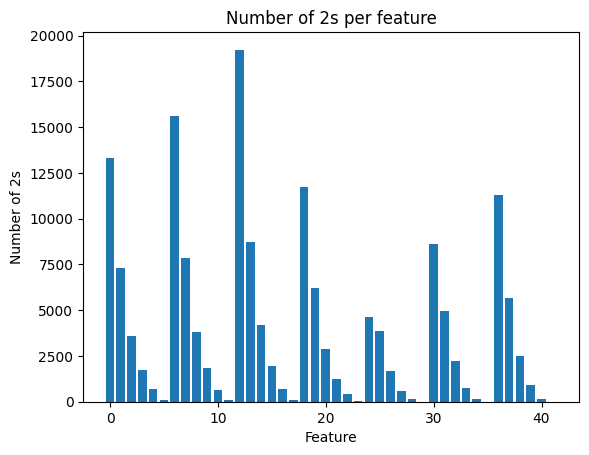

In [2]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

my_dict = pickle.load(open('./ass2.pickle', 'rb'))
train, test, dev = my_dict["train"], my_dict["test"], my_dict["dev"]

print("Train shape:", train.shape)
print("Number of train samples:", train.shape[0])
print("Dev shape:", dev.shape)
print("Number of dev samples:", dev.shape[0])
print("Test shape: ", test.shape)
print("Number of test samples:", test.shape[0])

print("Number of features:", train.shape[1])


target = train.values[:, -1]

df = pd.DataFrame(train)
print("Statistics for each feature:\n", df.describe())
# From this we can learn that that the classes are: 0, 1, 2

class_0 = np.count_nonzero(target == 0)
class_1 = np.count_nonzero(target == 1)
class_2 = np.count_nonzero(target == 2)

print("in class 0 there are ", class_0, "samples.")
print("in class 1 there are ", class_1, "samples.")
print("in class 2 there are ", class_2, "samples.")
# We see that the dataset is unbalanced

# If we look at feature f8, we see that over 75% of samples received 0 in this feature. 
# However, as the maximum value seen is 2 and the meam is 0.28, we can assume that there are some outliers.

# Plots for features values:
# Target value 0 
x_value = []
y_value = []
for i in range(0, 42):
    x_value.append(i)
    y_value.append(np.count_nonzero(train.values[:, i] == 0))

plt.bar(x_value, y_value)

plt.xlabel('Feature')
plt.ylabel('Number of 0s')
plt.title('Number of 0s per feature')

plt.show()

# Target value 1
x_value = []
y_value = []
for i in range(0, 42):
    x_value.append(i)
    y_value.append(np.count_nonzero(train.values[:, i] == 1))

plt.bar(x_value, y_value)

plt.xlabel('Feature')
plt.ylabel('Number of 1s')
plt.title('Number of 1s per feature')

plt.show()

# Target value 2
x_value = []
y_value = []
for i in range(0, 42):
    x_value.append(i)
    y_value.append(np.count_nonzero(train.values[:, i] == 2))

plt.bar(x_value, y_value)

plt.xlabel('Feature')
plt.ylabel('Number of 2s')
plt.title('Number of 2s per feature')

plt.show()


*   Separating target labels from the actual data (into X and y) 
*   Creating a new training set which consists of the train and dev data sets

In [8]:
import numpy as np
train_array = train.values
dev_array = dev.values

X_train = train_array[:, :-1]
y_train = train_array[:, -1]

X_dev = dev_array[:, :-1]
y_dev = dev_array[:, -1]

final_Xtrain = np.concatenate((X_train, X_dev))
final_Ytrain = np.concatenate((y_train, y_dev))

finalTestArray = test.values
finalX_test = finalTestArray[:, :-1]
finalY_test = finalTestArray[:, -1]


## K Nearest Neighbours
We understood from our preliminary data analysis that we need a classification model.

The first model we tried was KNN. As we know it is a simple algorithm that doesn't need specific information about the data. 

The only hyperparameter that needs to be tuned is K- the number of neighbors that are taken into consideration when deciding on a new point's label.

We received an accuracy of 77%, which is not too bad, but we expected to get higher accuracy. This makes sense as KNN doesn't work well on imbalanced datasets.

As we saw in the preliminary data analysis, our dataset has some outliers and has many features, therefore KNN might not be the best model choice.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def KNN(Xtrain, Xtest, Ytrain, Ytest, k):
  # Creating the classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  # Fitting the classifier manually
  knn.fit(Xtrain, Ytrain)

  # Predicting the classes for the test set
  predictions = knn.predict(Xtest)
  
  # Evaluating accuracy
  accuracy = accuracy_score(Ytest, predictions)

  return accuracy

max_accuracy = 0
best_k = 1
for k in range(1, 21): 
  curr_accuracy = KNN(X_train, X_dev, y_train, y_dev, k)
  if max_accuracy < curr_accuracy:
    max_accuracy = curr_accuracy
    best_k = k

best_estimators = {"n_estimators": best_k}

print("Best parameters:", best_estimators)
print("Best accuracy:", max_accuracy)


Best parameters: {'n_estimators': 11}
Best accuracy: 0.7678359976317347


## Logistic Regression 
From our conclusion in the previous model, we decided not to try Linear Regression as it is sensitive to outliers. The next model we tried was Logistic Regression, as it is not sensitive to outliers.

We chose to tune the following hyperparameters:

*   C: in charge of regularization, smaller value = stronger regularization.
*   tol: the stopping criteria.

Unfortunately, this model received a relatively low accuracy- 66%.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters we're tuning
params = {
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-4, 1e-5],
}

# Creating the classifier
logreg = LogisticRegression(max_iter=1000)

# Fitting the classifier using GridSearch
grid_search = GridSearchCV(logreg, params, scoring='accuracy', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_logreg = grid_search.best_estimator_
best_logreg.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_
print("Accuracy:", best_training_score)


Best parameters: {'C': 0.1, 'tol': 0.001}
Accuracy: 0.6610787306873902


Now we decided to try some tree models.

## Decision Tree
The first tree model we tried was the Decision Tree.

We received a relatively low accuracy of 73%. It was reasonable because we know this model can easily overfit the data, which means an overall good accuracy for the trained data, but not a good accuracy for data it has not seen.

We chose to tune the following hyperparameters:

*   max_depth: the maximum depth of the tree, this hyperparameter can help in preventing overfitting.
*   criterion: the function to measure the quality of the split

In our case, the best max_depth value we found was None, which means the nodes are expended until all leaves are pure. Therefore, it is not surprising that we got a model that overfits.  


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters we're tuning
params = {
    'max_depth': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Creating the classifier
dt = DecisionTreeClassifier()

# Fitting the classifier using GridSearch
grid_search = GridSearchCV(dt, params, scoring='accuracy', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)

# Refitting the model with the best parameters on the real test set
best_dt = grid_search.best_estimator_
best_dt.fit(final_Xtrain, final_Ytrain)

# Evaluating accuracy
best_training_score = grid_search.best_score_
print("Accuracy:", best_training_score)


Best parameters: {'criterion': 'entropy', 'max_depth': None}
Accuracy: 0.7269682671847535


## Random Forest
The next model we tried was Random Forest, hoping it will improve the Decision Tree's faults. 

This model improves the overfitting issue we previously encountered. It can also benefit our specific dataset because it works well on imbalanced and large datasets and outliers have little impact. 

The hyperparameter we tuned was:
*   n_estimators- number of trees in the forest. 

We got an accuracy of 81%, the best model yet. Bam! 

We will now try to improve it using the boosting algorithms.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def randomForest(Xtrain, Xtest, Ytrain, Ytest, n):
  # Creating the classifier
  rf = RandomForestClassifier(n_estimators=n)

  # Fitting the classifier manually
  rf.fit(Xtrain, Ytrain)

  # Predicting the classes for the test set
  y_pred = rf.predict(Xtest)

  # Evaluating accuracy
  accuracy = accuracy_score(Ytest, y_pred)

  return accuracy

max_accuracy = 0
best_n = 50

for n in np.arange(50, 250, 50):
  curr_accuracy = randomForest(X_train, X_dev, y_train, y_dev, n)
  if max_accuracy < curr_accuracy:
    max_accuracy = curr_accuracy
    best_n = n

best_estimators = {"n_estimators": best_n}
print("Best parameters:", best_estimators)
print("Best accuracy:", max_accuracy)


Best parameters: {'n_estimators': 200}
Best accuracy: 0.8114268798105387


## Adaptive Boosting
The first boosting algorithm we chose was AdaBoost, a fast model with little tuning needed. 

The hyperparameters we tuned:

*   n_estimators- the maximum number of estimators at which the boosting stops. 
*   learning_rate- the weight given to each classifier at each iteration. 

There is a tradeoff between these two parameters. 

In contrast to what we thought would happen, this Model did not improve our Random Forest model, as we got an accuracy of 75%.


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameters we're tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Creating the classifier
adaB = AdaBoostClassifier()

# Fitting the classifier using GridSearch
grid_search = GridSearchCV(adaB, param_grid, scoring='accuracy')
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best parameters: {'learning_rate': 1.0, 'n_estimators': 150}
Best Score: 0.7470811360902951


## Gradient Boosting
The second boosting model we tried wad Gradient Boosting. 

This model usually has good performance, so we hoped that unlike the AdaBoost model, it will improve the Random Forest model's accuracy. 

The hyperparameters we tuned are:

*   learning_rate- shrinks the contribution of each tree by learning_rate value. 
*   n_estimators- the number of boosting iterations to perform. Since this model is good at preventing overfitting, usually a larger number gives better performance. 
*   max_depth- maximum depth of the individual trees. It limits the number of nodes in the tree. 

There is a tradeoff between learning_rate and n_estimators.

This model yielded the best accuracy so far- 82%, even better than the Random Forest model! Double Bam!


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Defining the hyperparameters we're tuning
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
}

# Creating the classifier
gb = GradientBoostingClassifier()

# Fitting the classifier using GridSearch
grid_search = GridSearchCV(estimator=gb, param_grid=params, scoring='accuracy', cv=3)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Accuracy: 0.8231201894612197


## XGBoost
The last boosting model we tried was the XGBoost model. 

XGBoost has many advantages regarding our dataset, as it is not sensitive to outliers, works well with large datasets and is less prone to overfitting. 

Although it is harder to tune, we tried many different hyperparameters combinations, and in our search for the best hyperparameters, we found that nothing beats the default values. 

We got the highest accuracy score- 83%. Triple Bam!!!


In [7]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Creating the classifier
xgb = XGBClassifier()

# Fitting the classifier
xgb.fit(X_train, y_train)

# Making predictions on the dev data
y_pred = xgb.predict(X_dev)

# Evaluating accuracy
accuracy = accuracy_score(y_dev, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8335553582001184


## Support Vector Classifier
Now that we've finished trying our tree models, we will try one more model we've learned- SVC. 
This model works well with outliers.

The hyperparameters we tuned are:

*   C - regularization parameter.
*   Tol - stopping criterion.

We received a good accuracy- 82%, but still not as good as our current winner- XGBoost.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Defining the hyperparameters we're tuning
param_grid = {
    'C': [0.1, 1, 10],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Creating the classifier
svc = SVC()

# Fitting the classifier using GridSearch
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)
grid_search.fit(final_Xtrain, final_Ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Best parameters: {'C': 10, 'tol': 0.001}
Accuracy: 0.8170515097690941


# Conclusion:
After trying many models with different hyperparameters, we found that the best model for our dataset is XGBoost with an accuracy score of 83% 👑

The models we experimented on we're:


*   K Nearest Neighbours
*   Logistic Regression
*   Decision Tree
*   Random Forest
*   Adaptive Boosting
*   Gradient Boosting
*   XGBoost
*   Support Vector Classifier

The preliminary data analysis helped us understand the model type to chose (classification). Also helped us decied on which classification models to try after determining the datasets traits, such as: unbalanced data, outliers, data size and more.

The metrics we used in order to determine which model to chose was the sklearn.metrics.accuracy_score metric.


In [9]:
winning_model = xgb

# Making predictions on the test data
y_final_test_pred = winning_model.predict(finalX_test)

# Evaluating accuracy
winning_model_accuracy = accuracy_score(finalY_test, y_final_test_pred)

print("Winning model accuracy on test data:", winning_model_accuracy)

Winning model accuracy on test data: 0.8302989934872705


We can see that the accuracy of our winning model (XGB) on the test data it has never seen before stayed high - with a accuracy of 83%!